<a href="https://colab.research.google.com/github/YaCpotato/python_tutorial_reading_session/blob/master/Python%E3%83%81%E3%83%A5%E3%83%BC%E3%83%88%E3%83%AA%E3%82%A2%E3%83%AB%E8%BC%AA%E8%AA%AD%E4%BC%9AVol_5%E7%94%A8%E3%83%8E%E3%83%BC%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7. 入出力

## 過去問に出たモジュールの問題

```python
import reprlib
reprlib.repr(set('diveintocode'))
```
1. set関数で重複がなくなった集合ができる(この時点で選択肢に値が被っているものは除かれる)
2. reprlib.reprは、Python組み込みのrepr関数とは少し違い、出力が多いものは制限して表示する  
以下reprlib.reprの説明
>reprlib モジュールは、結果の文字列のサイズに対する制限付きでオブジェクト表現を生成するための手段を提供します。これは Python デバッガの中で使用されており、他の文脈でも同様に役に立つかもしれません




In [1]:
import reprlib
reprlib.repr(set('diveintocode'))

"{'c', 'd', 'e', 'i', 'n', 'o', ...}"

In [2]:
# Pythonのビルトインモジュールのrepr
repr(set('diveintocode'))

"{'d', 'v', 'c', 'o', 'i', 't', 'e', 'n'}"

プログラムの出力方法にはいくつかの種類があります。 データを人間が読める形で出力することもあれば、将来使うためにファイルに書くこともあります。 この章では、こうした幾つかの出力の方法について話します。

### 7.1. 出力を見やすくフォーマットする
これまでに、値を出力する二つの方法: 式文 (expression statement) と print() 関数が出てきました。 (第三はファイルオブジェクトの write() メソッドを使う方法です。標準出力を表すファイルは sys.stdout で参照できます。詳細はライブラリリファレンスを参照してください。)

Often you’ll want more control over the formatting of your output than simply printing space-separated values. There are two ways to format your output; the first way is to do all the string handling yourself; using string slicing and concatenation operations you can create any layout you can imagine. The string type has some methods that perform useful operations for padding strings to a given column width; these will be discussed shortly. The second way is to use the str.format() method.

string モジュールの Template クラスも、文字列中の値を置換する別の方法を提供しています。

もちろん、一つ問題があります。値をどうやって文字列に変換したらいいのでしょうか？幸運なことに、Python には値を文字列に変換する方法があります。値を repr() か str() 関数に渡してください。

str() 関数は値の人間に読める表現を返すためのもので、 repr() 関数はインタープリタに読める (あるいは同値となる構文がない場合は必ず SyntaxError になるような) 表現を返すためのものです。人間が読むのに適した特定の表現を持たないオブジェクトにおいては、 str() は repr() と同じ値を返します。数値や、リストや辞書を始めとするデータ構造など、多くの値がどちらの関数に対しても同じ表現を返します。一方、文字列は、2つの異なる表現を持っています。

```python
>>> s = 'Hello, world.'
>>> str(s)
'Hello, world.'
>>> repr(s)
"'Hello, world.'"
>>> str(1/7)
'0.14285714285714285'
>>> x = 10 * 3.25
>>> y = 200 * 200
>>> s = 'The value of x is ' + repr(x) + ', and y is ' + repr(y) + '...'
>>> print(s)
The value of x is 32.5, and y is 40000...
>>> # The repr() of a string adds string quotes and backslashes:
... hello = 'hello, world\n'
>>> hellos = repr(hello)
>>> print(hellos)
'hello, world\n'
>>> # The argument to repr() may be any Python object:
... repr((x, y, ('spam', 'eggs')))
"(32.5, 40000, ('spam', 'eggs'))"
```
以下に 2 乗と 3 乗の値からなる表を書く二つの方法を示します:

```
>>> for x in range(1, 11):
...     print(repr(x).rjust(2), repr(x*x).rjust(3), end=' ')
...     # Note use of 'end' on previous line
...     print(repr(x*x*x).rjust(4))
...
 1   1    1
 2   4    8
 3   9   27
 4  16   64
 5  25  125
 6  36  216
 7  49  343
 8  64  512
 9  81  729
10 100 1000

>>> for x in range(1, 11):
...     print('{0:2d} {1:3d} {2:4d}'.format(x, x*x, x*x*x))
...
 1   1    1
 2   4    8
 3   9   27
 4  16   64
 5  25  125
 6  36  216
 7  49  343
 8  64  512
 9  81  729
10 100 1000
```

<u>**同じに見える。何言うてるかわからんので下の画像参考
Jupyter系とかだと勝手にフォーマットされて現象が確認できなそうです。ターミナルでインタプリタ使うと見やすいです<br>rjustに関しては右揃えにできるメソッドで、引数は確保するスペースみたい**</u>

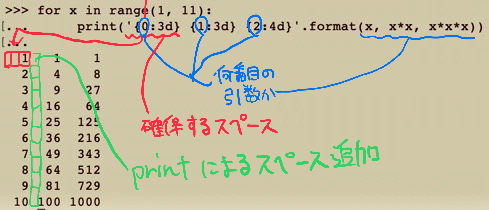

(最初の例で、各カラムの間のスペース一個は print() により追加されていることに注意してください。 print() は引数間に常に空白を追加します。)

この例では、文字列の str.rjust() メソッドの使い方を示しています。 str.rjust() は文字列を指定された幅のフィールド内に右詰めで入るように、左に空白を追加します。同様のメソッドとして、 str.ljust() と str.center() があります。これらのメソッドは何か出力を行うわけではなく、ただ新しい文字列を返します。入力文字列が長すぎる場合、文字列を切り詰めることはせずに値をそのまま返します。この仕様のためにカラムのレイアウトが滅茶苦茶になるかもしれませんが、嘘の値が代わりに書き出されるよりはましです。(本当に切り詰めを行いたいのなら、全てのカラムに x.ljust(n)[:n] のようにスライス表記を加えることもできます。)

もう一つのメソッド、 str.zfill() は、数値文字列の左側をゼロ詰めします。このメソッドは正と負の符号を正しく扱います:

```python
>>> '12'.zfill(5)
'00012'
>>> '-3.14'.zfill(7)
'-003.14'
>>> '3.14159265359'.zfill(5)
'3.14159265359'
```

str.format() メソッドの基本的な使い方は次のようなものです:
```python
>>> print('We are the {} who say "{}!"'.format('knights', 'Ni'))
We are the knights who say "Ni!"
```

括弧とその中の文字(これをフォーマットフィールドと呼びます)は、 str.format() メソッドに渡されたオブジェクトに置換されます。括弧の中の数字は str.format() メソッドに渡されたオブジェクトの位置を表すのに使えます。

```
>>> print('{0} and {1}'.format('spam', 'eggs'))
spam and eggs
>>> print('{1} and {0}'.format('spam', 'eggs'))
eggs and spam
```

str.format() メソッドにキーワード引数が渡された場合、その値はキーワード引数の名前によって参照されます。

```
>>> print('This {food} is {adjective}.'.format(
...       food='spam', adjective='absolutely horrible'))
This spam is absolutely horrible.
```

順序引数とキーワード引数を組み合わせて使うこともできます:

```
>>> print('The story of {0}, {1}, and {other}.'.format('Bill', 'Manfred',
                                                       other='Georg'))
The story of Bill, Manfred, and Georg.
```

ascii() を適応する '!a' や str() を適応する '!s' や repr() を適応する '!r' を使って、値をフォーマットする前に変換することができます:

```
>>> contents = 'eels'
>>> print('My hovercraft is full of {}.'.format(contents))
My hovercraft is full of eels.
>>> print('My hovercraft is full of {!r}.'.format(contents))
My hovercraft is full of 'eels'.
```

オプションの ':' とフォーマット指定子を、フィールド名の後ろに付けることができます。フォーマット指定子によって値がどうフォーマットされるかを制御することができます。次の例では、円周率πを、小数点以下3桁で丸めてフォーマットしています。

```
>>> import math
>>> print('The value of PI is approximately {0:.3f}.'.format(math.pi))
The value of PI is approximately 3.142.
```

':' の後ろに整数をつけると、そのフィールドの最低の文字幅を指定できます。この機能は綺麗なテーブルを作るのに便利です。

```
>>> table = {'Sjoerd': 4127, 'Jack': 4098, 'Dcab': 7678}
>>> for name, phone in table.items():
...     print('{0:10} ==> {1:10d}'.format(name, phone))
...
Jack       ==>       4098
Dcab       ==>       7678
Sjoerd     ==>       4127
```

もしも長い書式文字列があり、それを分割したくない場合には、変数を引数の位置ではなく変数の名前で参照できるとよいでしょう。これは、辞書を引数に渡して、角括弧 '[]' を使って辞書のキーを参照することで可能です

```
>>> table = {'Sjoerd': 4127, 'Jack': 4098, 'Dcab': 8637678}
>>> print('Jack: {0[Jack]:d}; Sjoerd: {0[Sjoerd]:d}; '
...       'Dcab: {0[Dcab]:d}'.format(table))
Jack: 4098; Sjoerd: 4127; Dcab: 8637678
```

table を 『**』 記法を使ってキーワード引数として渡す方法もあります。

```
>>> table = {'Sjoerd': 4127, 'Jack': 4098, 'Dcab': 8637678}
>>> print('Jack: {Jack:d}; Sjoerd: {Sjoerd:d}; Dcab: {Dcab:d}'.format(**table))
Jack: 4098; Sjoerd: 4127; Dcab: 8637678
```

全てのローカルな変数が入った辞書を返す組み込み関数 vars() と組み合わせると特に便利です。

str.format() による文字列書式設定の完全な解説は、 書式指定文字列の文法 を参照してください。



#### 7.1.1. 古い文字列書式設定方法
% 演算子を使って文字列書式設定をする方法もあります。これは、演算子の左側の sprintf() スタイルのフォーマット文字列に、演算子の右側の値を適用し、その結果の文字列を返します。例えば:
```
>>>
>>> import math
>>> print('The value of PI is approximately %5.3f.' % math.pi)
The value of PI is approximately 3.142.
```
より詳しい情報は printf 形式の文字列書式化 にあります。

### 7.2. ファイルを読み書きする

open() は file object を返します。大抵、 open(filename, mode) のように二つの引数を伴って呼び出されます。
```
>>>
>>> f = open('workfile', 'w')
```
最初の引数はファイル名の入った文字列です。二つめの引数も文字列で、ファイルをどのように使うかを示す数個の文字が入っています。 mode は、ファイルが読み出し専用なら 'r' 、書き込み専用 (同名の既存のファイルがあれば消去されます) なら 'w' とします。 'a' はファイルを追記用に開きます。ファイルに書き込まれた内容は自動的にファイルの終端に追加されます。 'r+' はファイルを読み書き両用に開きます。 mode 引数は省略可能で、省略された場合には 'r' であると仮定します。

通常、ファイルはテキストモード (text mode) で開かれ、特定のエンコーディングでエンコードされたファイルに対して文字列を読み書きします。エンコーディングが指定されなければ、デフォルトはプラットフォーム依存です (open() を参照してください) 。モードに 'b' をつけるとファイルをバイナリモード (binary mode) で開き、 byte オブジェクトを読み書きします。テキストファイル以外のすべてのファイルはバイナリモードを利用するべきです。

テキストモードの読み取りでは、プラットフォーム固有の行末記号 (Unix では \n 、Windows では \r\n) をただの \n に変換するのがデフォルトの動作です。テキストモードの書き込みでは、 \n が出てくる箇所をプラットフォーム固有の行末記号に戻すのがデフォルトの動作です。この裏で行われるファイルデータの変換はテキストファイルには上手く働きますが、 JPEG ファイルや EXE ファイルのようなバイナリデータを破壊する恐れがあります。そのようなファイルを読み書きする場合には注意して、バイナリモードを使うようにしてください。

It is good practice to use the with keyword when dealing with file objects. The advantage is that the file is properly closed after its suite finishes, even if an exception is raised at some point. Using with is also much shorter than writing equivalent try-finally blocks:
```
>>>
>>> with open('workfile') as f:
...     read_data = f.read()
>>> f.closed
True
```
If you’re not using the with keyword, then you should call f.close() to close the file and immediately free up any system resources used by it. If you don’t explicitly close a file, Python’s garbage collector will eventually destroy the object and close the open file for you, but the file may stay open for a while. Another risk is that different Python implementations will do this clean-up at different times.

After a file object is closed, either by a with statement or by calling f.close(), attempts to use the file object will automatically fail.
```
>>>
>>> f.close()
>>> f.read()
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ValueError: I/O operation on closed file
```
#### 7.2.1. ファイルオブジェクトのメソッド
この節の以降の例は、 f というファイルオブジェクトが既に生成されているものと仮定します。

ファイルの内容を読み出すには、 f.read(size) を呼び出します。このメソッドはある量のデータを読み出して、文字列 (テキストモードの場合) か bytes オブジェクト (バイナリーモードの場合) として返します。 size はオプションの数値引数です。 size が省略されたり負の数であった場合、ファイルの内容全てを読み出して返します。ただし、ファイルがマシンのメモリの二倍の大きさもある場合にはどうなるかわかりません。 size が負でない数ならば、最大で size バイトを読み出して返します。ファイルの終端にすでに達していた場合、 f.read() は空の文字列 ('') を返します。
```
>>>
>>> f.read()
'This is the entire file.\n'
>>> f.read()
''
```
f.readline() はファイルから 1 行だけを読み取ります。改行文字 (\n) は読み出された文字列の終端に残ります。改行が省略されるのは、ファイルが改行で終わっていない場合の最終行のみです。これは、戻り値があいまいでないようにするためです; f.readline() が空の文字列を返したら、ファイルの終端に達したことが分かります。一方、空行は '\n'、すなわち改行 1 文字だけからなる文字列で表現されます。
```
>>>
>>> f.readline()
'This is the first line of the file.\n'
>>> f.readline()
'Second line of the file\n'
>>> f.readline()
''
```
ファイルから複数行を読み取るには、ファイルオブジェクトに対してループを書く方法があります。この方法はメモリを効率的に使え、高速で、簡潔なコードになります:
```
>>>
>>> for line in f:
...     print(line, end='')
...
This is the first line of the file.
Second line of the file
```
ファイルのすべての行をリスト形式で読み取りたいなら、list(f) や f.readlines() を使うこともできます。

f.write(string) は、string の内容をファイルに書き込み、書き込まれた文字数を返します。
```
>>>
>>> f.write('This is a test\n')
15
```
オブジェクトの他の型は、書き込む前に変換しなければなりません – 文字列 (テキストモード) と bytes オブジェクト (バイナリーモード) のいずれかです:
```
>>>
>>> value = ('the answer', 42)
>>> s = str(value)  # convert the tuple to string
>>> f.write(s)
18
```
f.tell() は、ファイルオブジェクトのファイル中における現在の位置を示す整数を返します。ファイル中の現在の位置は、バイナリモードではファイルの先頭からのバイト数で、テキストモードでは不明瞭な値で表されます。

ファイルオブジェクトの位置を変更するには、f.seek(offset, from_what) を使います。ファイル位置は基準点 (reference point) にオフセット値 offset を足して計算されます。参照点は from_what 引数で選びます。from_what の値が 0 ならばファイルの 先頭から測り、1 ならば現在のファイル位置を使い、2 ならばファイルの終端を参照点として使います。from_what は省略することができ、デフォルトの値は 0、すなわち参照点としてファイルの先頭を使います。
```
>>>
>>> f = open('workfile', 'rb+')
>>> f.write(b'0123456789abcdef')
16
>>> f.seek(5)      # Go to the 6th byte in the file
5
>>> f.read(1)
b'5'
>>> f.seek(-3, 2)  # Go to the 3rd byte before the end
13
>>> f.read(1)
b'd'
```
テキストファイル (mode 文字列に b を付けなかった場合) では、ファイルの先頭からの相対位置に対するシークだけが許可されています (例外として、seek(0, 2) でファイルの末尾へのシークは可能です)。また、唯一の有効な offset 値は f.tell() から返された値か、0 のいずれかです。それ以外の offset 値は未定義の振る舞いを引き起こします。

ファイルオブジェクトには、他にも isatty() や truncate() といった、あまり使われないメソッドがあります。ファイルオブジェクトについての完全なガイドは、ライブラリリファレンスを参照してください。

#### 7.2.2. json による構造化されたデータの保存
文字列は簡単にファイルに書き込んだり、ファイルから読み込んだりすることができます。数値の場合には少し努力が必要です。というのも、read() メソッドは文字列しか返さないため、int() のような関数にその文字列を渡して、たとえば文字列 '123' のような文字列を、数値 123 に変換しなくてはならないからです。もっと複雑なデータ型、例えば入れ子になったリストや辞書の場合、手作業でのパースやシリアライズは困難になります。

ユーザが毎回コードを書いたりデバッグしたりして複雑なデータ型をファイルに保存するかわりに、Python では一般的なデータ交換形式である JSON (JavaScript Object Notation) を使うことができます。この標準モジュール json は、Python のデータ 階層を取り、文字列表現に変換します。この処理は シリアライズ (serializing) と呼ばれます。文字列表現からデータを再構築することは、デシリアライズ (deserializing) と呼ばれます。シリアライズされてからデシリアライズされるまでの間に、オブジェクトの文字列表現はファイルやデータの形で保存したり、ネットワークを通じて離れたマシンに送ったりすることができます。

注釈 JSON 形式は現代的なアプリケーションでデータをやりとりする際によく使われます。多くのプログラマーが既に JSON に詳しいため、JSON はデータの相互交換をする場合の良い選択肢です。
オブジェクト x があり、その JSON 形式の文字列表現を見るには、単純な1行のコードを書くだけです:
```
>>>
>>> import json
>>> json.dumps([1, 'simple', 'list'])
'[1, "simple", "list"]'
```
dumps() に似た関数に、dump() があり、こちらは単純にオブジェクトを text file にシリアライズします。f が書き込み用に開かれた text file だとすると、次のように書くことができます:
```
json.dump(x, f)
```
逆にデシリアライズするには、f が読み込み用に開かれた text file だとすると、次のようになります:
```
x = json.load(f)
```
このような単純なシリアライズをする手法は、リストや辞書を扱うことはできますが、任意のクラス・インスタンスを JSON にシリアライズするにはもう少し努力しなくてはなりません。json モジュールのリファレンスにこれについての解説があります。